In [2]:
import iris
import sklearn
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import iris.quickplot as qplt
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE, MDS
%matplotlib inline  

In [95]:
def load_temp(n):
    crut_file = "/Users/admin/Downloads/HadCRUT.4.4.0.0.anomalies.1_to_10_netcdf/HadCRUT.4.4.0.0.anomalies.%d.nc"%n
    crut = iris.load(crut_file)
    temp = crut[0]
    for t in range(temp.data.shape[0]):
        temp.data[t] = temp.data[t] / max(temp.data[t].max(), -temp.data[t].min())
        temp.data[t].set_fill_value(temp.data[t].mean())
    return temp

temps = []
for i in range(1,11):
    temps.append(load_temp(i))
temps

[<iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>]

In [188]:
def load_temp(n):
    crut_file = "/Users/admin/Downloads/HadCRUT.4.4.0.0.anomalies.1_to_10_netcdf/HadCRUT.4.4.0.0.anomalies.%d.nc"%n
    crut = iris.load(crut_file)
    temp = crut[0]
    temp.data.set_fill_value(temp.data.mean())
    norm_temp = temp / max(temp.data.filled().max(), -temp.data.filled().min())
#     norm_temp = temp / -1e+30
#     norm_temp = iris.cube.Cube(np.ma.array(np.ones(temp.shape)))
#     norm_temp = temp
    norm_temp.data.set_fill_value(norm_temp.data.mean())
#     norm_temp.data.set_fill_value(1)
    return norm_temp

temps = []
for i in range(1,11):
    temps.append(load_temp(i))
temps

[<iris 'Cube' of unknown / (kelvin) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of unknown / (kelvin) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of unknown / (kelvin) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of unknown / (kelvin) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of unknown / (kelvin) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of unknown / (kelvin) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of unknown / (kelvin) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of unknown / (kelvin) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of unknown / (kelvin) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of unknown / (kelvin) (time: 1995; latitude: 36; longitude: 72)>]

In [115]:
def show_tsne(timeseries):
    tsne = TSNE(n_components=2, random_state=0)
    timesteps = timeseries.shape[0]
    pts = timeseries.shape[1] * timeseries.shape[2]
    result = tsne.fit_transform(timeseries.data.filled().reshape(timesteps, pts))
    plt.scatter(result[:, 0], result[:, 1], c=np.arange(timesteps))
    plt.show()

In [191]:
def show_both(timeseries):
    show_tsne(iris.cube.Cube(np.ma.array(timeseries.data.mask.astype(int))))
    show_tsne(timeseries)

In [116]:
# full time series

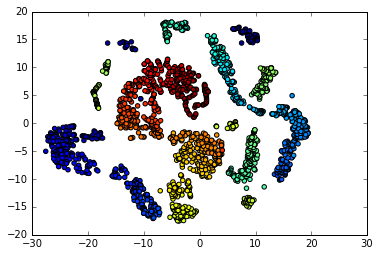

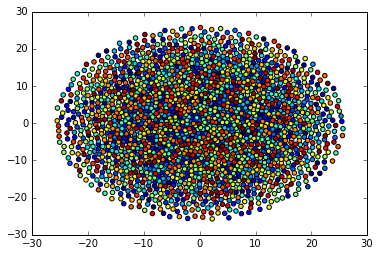

In [192]:
show_both(temps[0])

In [151]:
# first half of timesteps

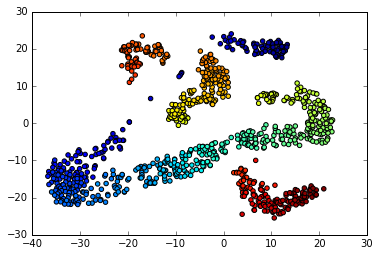

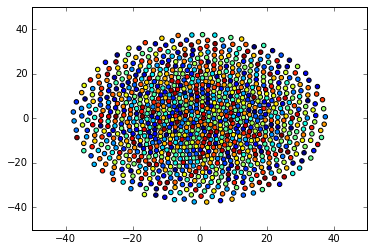

In [193]:
show_both(temps[0][:temps[0].shape[0]/2,:,:])

In [153]:
# second half of timesteps

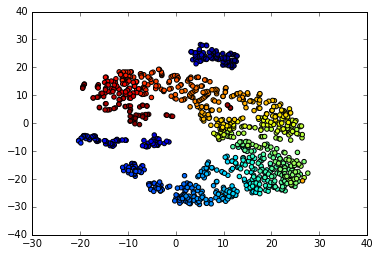

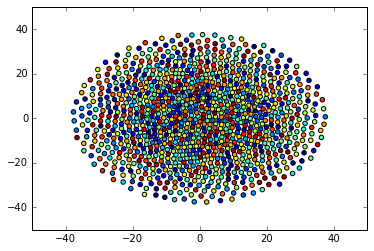

In [194]:
show_both(temps[0][temps[0].shape[0]/2:,:,:])

In [155]:
# first quarter of timesteps

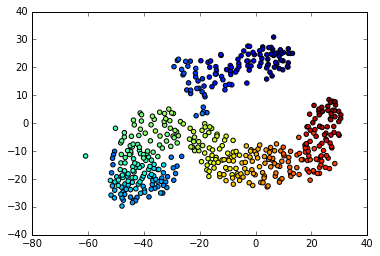

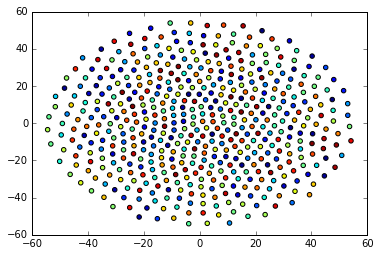

In [195]:
show_both(temps[0][:temps[0].shape[0]/4,:,:])

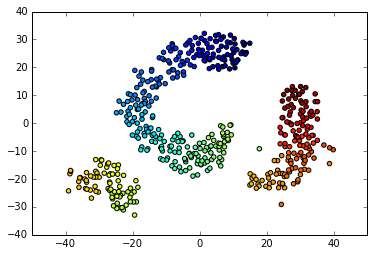

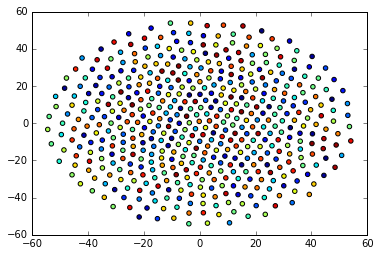

In [196]:
show_both(temps[0][temps[0].shape[0]/4:temps[0].shape[0]/2,:,:])

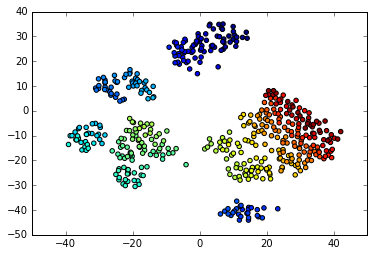

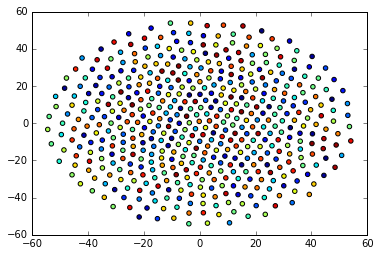

In [197]:
show_both(temps[0][temps[0].shape[0]/2:3*temps[0].shape[0]/4,:,:])

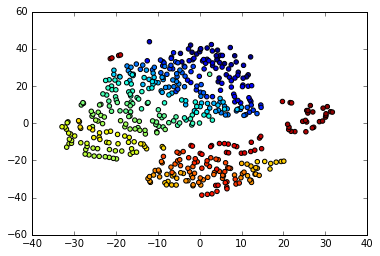

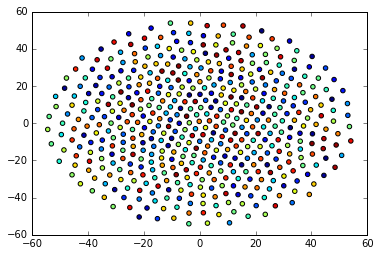

In [198]:
show_both(temps[0][3*temps[0].shape[0]/4:,:,:])